# Prediction Modeling

1. Fit a model to sample_data.csv
2. See how well the model *predicts* in sample2_data


See how accurate the model predictions are! Does it generalize?

**Forecasting**

In [1]:
import pandas as pd
import numpy as np

# sklearn is for modeling/regression/machine learning
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# plotting library for today
import matplotlib.pyplot as plt

# make plots show up nicely right in the jupyter notebook
%matplotlib inline

## Import datasets

In [2]:
train = pd.read_csv('sample_data.csv')
test = pd.read_csv('sample2_data.csv')

In [3]:
# rename columns
train.rename(columns = {'x':'age', 'y': 'brain_volume'}, inplace = True)
test.rename(columns = {'x':'age', 'y': 'brain_volume'}, inplace = True)
#train.brain_volume[3] = -50

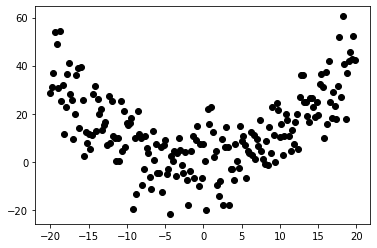

In [4]:
plt.scatter(train.age, train.brain_volume, color = 'black')

## Use age to predict brain volume!

* X - a matrix, expects 2d data
* y - a vector, expects 1d data

In [5]:
# in python, we specify *predictors* and *outcomes* separately

# we usually call the predictor X (this is a matrix)
X = train[['age']]

# we usually call the outcome y
y = train.brain_volume

# 2 degree polynomial & 15-degree polynomial
poly2 = PolynomialFeatures(2)
poly15 = PolynomialFeatures(70)
X_2 = poly2.fit_transform(X)
X_15 = poly15.fit_transform(X)

## Fit 3 models

* Linear regression
* Quadratic regression with age squared term
* 15-degree polynomial regression (with age^15th term)

In [6]:
# set up a 'linear regression object'
reg1 = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()
reg15 = linear_model.LinearRegression()


# now FIT the linear regression model
model1 = reg1.fit(X, y)
model2 = reg2.fit(X_2, y)
model15 = reg15.fit(X_15, y)

# generate predictions for every x-value from the regression model
model1_preds = reg1.predict(X)
model2_preds = reg2.predict(X_2)
model15_preds = reg15.predict(X_15)

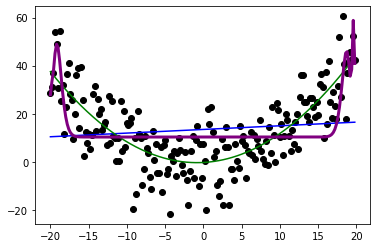

In [7]:
plt.scatter(train.age, train.brain_volume, color = 'black')
plt.plot(train.age, model1_preds, color = 'blue')
plt.plot(train.age, model2_preds, color = 'green')
plt.plot(train.age, model15_preds, color = 'purple', linewidth =3)

In [8]:
print(r2_score(train.brain_volume, model1_preds))
print(r2_score(train.brain_volume, model2_preds))
print(r2_score(train.brain_volume, model15_preds))

0.012288780577046188
0.6140052651128557
0.3237982935693635


# Enter the 'new' data....

In [9]:
# generating the x - matrices to use to predict outcomes on the new data
X_test = test[['age']]
X_test2 = poly2.fit_transform(X_test)
X_test15 = poly15.fit_transform(X_test)

### making *predictions* for brain volume for the test data WITHOUT fitting a model to it

the models are only fit to the train data

In [10]:
model1_preds_test = reg1.predict(X_test)
model2_preds_test = reg2.predict(X_test2)
model15_preds_test = reg15.predict(X_test15)

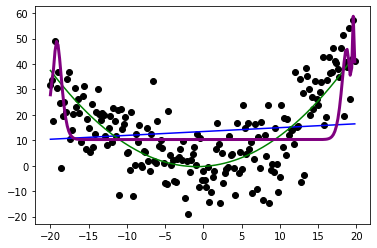

In [11]:
plt.scatter(test.age, test.brain_volume, color = 'black')
plt.plot(test.age, model1_preds_test, color = 'blue')
plt.plot(test.age, model2_preds_test, color = 'green')
plt.plot(test.age, model15_preds_test, color = 'purple', linewidth =3)

In [12]:
print(r2_score(test.brain_volume, model1_preds_test))
print(r2_score(test.brain_volume, model2_preds_test))
print(r2_score(test.brain_volume, model15_preds_test))

0.02768153973988796
0.5899212667901004
0.23448384577063108


# We look to performance on the test data for the optimum between underfitting & overfitting

- we don't want to be too simple or too complex
- balance can be hard to find

http://mlwiki.org/index.php/Overfitting